In [9]:
# If the below code doesn't work uncomment this and run (this adds the parent directory to the path)
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np
from scipy import stats

dl = DataLib("SignalData")

In [12]:
# Pull all the necessary dataframes to avoid duplicate code. 
bri = dl.pull("BondRetIdx/LocalFX")
LongRates = dl.pull("LongRates")
ShortRates = dl.pull("ShortRates")
EquityPrices = dl.pull("EquityPrices")
M1 = dl.pull("M1/inUSD")
M2 = dl.pull("M2/inUSD")
M3 = dl.pull("M3/inUSD")
CurrAcctNom = dl.pull("CurrAcctNom/inUSD")
CurrAcctPctGDP = dl.pull("CurrAcctPctGDP")
nGDP = dl.pull("GDP/Nominal")
rGDP = dl.pull("GDP/Real")
nFxTrdWts = dl.pull("fxTrdWts/Nominal")
rFxTrdWts = dl.pull("fxTrdWts/Real")
fxVsUSD = dl.pull("fxVsUSD")
core_cpi = dl.pull("CoreCPI/SA")

# `TODO`
- Look at the correlations of different return streams
- Look at the risk adjusted return ratios of different return streams

In [13]:
GDP_zscore = dl.pull('GDP_zscore')
premium_zscore = dl.pull('premium_zscore')

**Returns for GDP indicator**

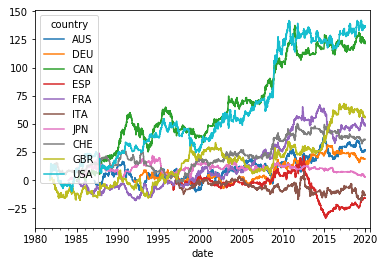

In [22]:
signal = GDP_zscore.clip(upper=1, lower=-1)
signal = signal[signal.index < '2020-01-01']
signal_gdp = signal.resample('B').ffill()

# Calculate cumulative returns. 
bri_chg = bri.pct_change()
returns = (bri_chg.shift(-1) * signal_gdp)       
cumul_returns_gdp = ((returns + 1).cumprod() - 1) * 100

# Plot the returns. 
cumul_returns_gdp.plot()

**Returns for Bond Premium indicator**

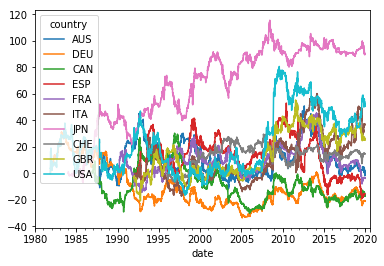

In [23]:
signal = premium_zscore.clip(upper=2, lower=-2)
signal = signal[signal.index < '2020-01-01']
signal_premium = signal.resample('B').ffill()

# Calculate cumulative returns. 
bri_chg = bri.pct_change()
returns = (bri_chg.shift(-1) * signal_premium)       
cumul_returns_premium = ((returns + 1).cumprod() - 1) * 100

# Plot the returns. 
cumul_returns_premium.plot()

**Correlation between return streams**

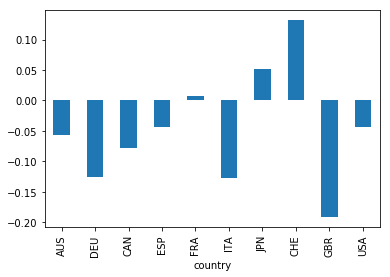

In [26]:
signal_gdp.corrwith(signal_premium).plot.bar()

In [32]:
combined = signal_gdp.join(signal_premium, lsuffix='_GDP', rsuffix='_premium')

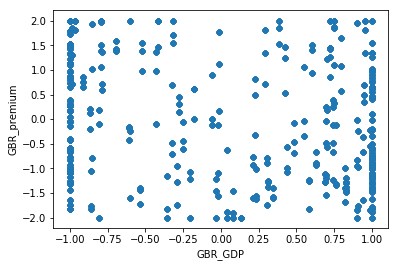

In [35]:
combined.plot(kind='scatter', x='GBR_GDP', y='GBR_premium')